This is a simple project to study prediction of BMI values using the sklearn in-built algorithms.

In [2]:
import os
import pandas as pd

def load_bmi_data():
    csv_path = "./bmidata.csv"
    return pd.read_csv(csv_path)

# It loads the CSV data file from the same directory as the notebook and describes the data
bmi_data = load_bmi_data()
bmi_data.head()

,height,weight,bmi
0,64,125,21.0
1,78,210,24.0
2,68,172,26.0
3,69,198,29.0
4,58,88,18.0


In [3]:
bmi_data.info()
bmi_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
height    200 non-null int64
weight    200 non-null int64
bmi       200 non-null float64
dtypes: float64(1), int64(2)
memory usage: 4.8 KB


,height,weight,bmi
count,200.000000,200.000000,200.000000
mean,67.845000,156.255000,23.960000
std,6.196204,50.558986,9.192984
min,58.000000,70.000000,8.000000
25%,63.000000,116.750000,17.000000
50%,67.500000,149.000000,22.000000
75%,74.000000,196.000000,29.000000
max,78.000000,250.000000,51.000000


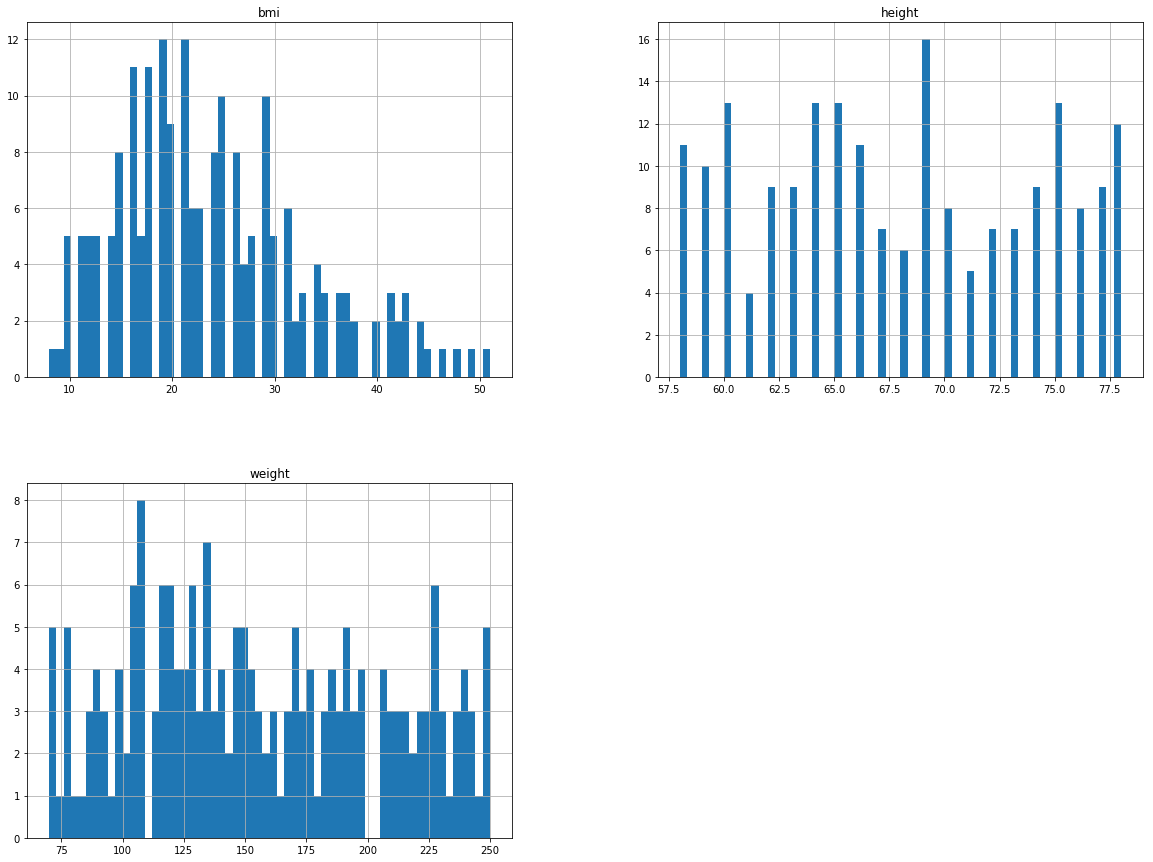

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
bmi_data.hist(bins=60, figsize=(20,15))
plt.show()

In [5]:
# From the CSV file, separate X and Y, where Y represents the labels and X represents the tuple containing height and weight
X_temp = bmi_data.copy()
X = X_temp.drop("bmi", axis=1)

Y_temp = bmi_data.copy()
Y = Y_temp.drop("height", axis=1).drop("weight", axis=1)

print("Shape of X is :" + str(X.shape))
print("Shape of Y is : "  + str(Y.shape))

Shape of X is :(200, 2)
Shape of Y is : (200, 1)


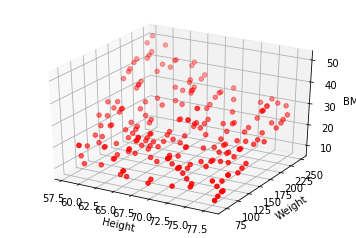

In [6]:
# Plot the data on a 3D surface

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(bmi_data["height"], bmi_data["weight"], bmi_data["bmi"], c='r')

ax.set_xlabel('Height')
ax.set_ylabel('Weight')
ax.set_zlabel('BMI')

In [9]:
# Calculate the mean RMS error in prediction between actual and predicted values

from sklearn.metrics import mean_squared_error
import numpy as np

def print_rms_error(Y, Y_predict):
    lin_mse = mean_squared_error(Y, Y_predict)
    lin_rmse = np.sqrt(lin_mse)
    print("RMS error in prediction : " + str(lin_rmse))

In [27]:
# Calculate the BMI given height in inches and weight in pounds

def calculate_bmi(height, weight):
    bmi = 1.0 * weight / (height * height) * 703
    return bmi

In [38]:
# Let's define 5 test samples
X_test = np.zeros([5,2])
X_test[0][0] = 68
X_test[0][1] = 168

X_test[1][0] = 74
X_test[1][1] = 165

X_test[2][0] = 60
X_test[2][1] = 110

X_test[3][0] = 60
X_test[3][1] = 90

X_test[4][0] = 68
X_test[4][1] = 200

Now we train a linear regression model to fit the data, calculate the RMS error and test the predictions against X_test.

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

lin_reg = LinearRegression()
lin_reg.fit(X, Y)

Y_predict = lin_reg.predict(X)

print_rms_error(Y, Y_predict)

for sample in X_test:
    height = sample[0]
    weight = sample[1]
    test_sample = np.zeros((1,2))
    test_sample[0][0] = height
    test_sample[0][1] = weight
    bmi_predict = lin_reg.predict(test_sample)
    print("Height : " + str(height) + " Weight : " + str(weight) + " predicted BMI : " + str(bmi_predict[0]) + " Actual BMI : " + str(calculate_bmi(height, weight)))

RMS error in prediction : 1.69545207201
Height : 68.0 Weight : 168.0 predicted BMI : [ 25.70081678] Actual BMI : 25.5415224913
Height : 74.0 Weight : 165.0 predicted BMI : [ 20.84033168] Actual BMI : 21.1824324324
Height : 60.0 Weight : 110.0 predicted BMI : [ 22.39372687] Actual BMI : 21.4805555556
Height : 60.0 Weight : 90.0 predicted BMI : [ 19.23639245] Actual BMI : 17.575
Height : 68.0 Weight : 200.0 predicted BMI : [ 30.75255185] Actual BMI : 30.4065743945


Simple linear regression model didn't do a very good job of predicting the BMI values. This is understandable because the BMI formula is quadratic. Thus, we transform the data to polynomial of degree 2 and then run that through linear regression.

In [55]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, Y)
Y_predict = lin_reg.predict(X_poly)

print_rms_error(Y, Y_predict)

for sample in X_test:
    height = sample[0]
    weight = sample[1]
    test_sample = np.zeros((1,2))
    test_sample[0][0] = height
    test_sample[0][1] = weight
    test_sample_poly = poly_features.fit_transform(test_sample)
    bmi_predict = lin_reg.predict(test_sample_poly)
    print("Height : " + str(height) + " Weight : " + str(weight) + " predicted BMI : " + str(bmi_predict[0]) + " Actual BMI : " + str(calculate_bmi(height, weight)))

RMS error in prediction : 0.337702788326
Height : 68.0 Weight : 168.0 predicted BMI : [ 25.09958904] Actual BMI : 25.5415224913
Height : 74.0 Weight : 165.0 predicted BMI : [ 20.6939305] Actual BMI : 21.1824324324
Height : 60.0 Weight : 110.0 predicted BMI : [ 21.11200851] Actual BMI : 21.4805555556
Height : 60.0 Weight : 90.0 predicted BMI : [ 17.22262807] Actual BMI : 17.575
Height : 68.0 Weight : 200.0 predicted BMI : [ 30.08768237] Actual BMI : 30.4065743945


Thus, the quadratic polynomial model models the data much more accurately.